In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [2]:
# Define the state
class CrashState(TypedDict):

    input: str
    step1: str
    step2: str
    step3: str

In [3]:
# Define steps
def step_1(state: CrashState) -> CrashState:
    print("Step 1 executed!!")
    return {'step1': 'done', 'input': state['input']}

def step_2(state: CrashState) -> CrashState:
    print("Step 2 hangine... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30) #Simulate long-running hang
    return {'step2': 'done'}

def step_3(state: CrashState) -> CrashState:
    print('Step 3 executed!!')
    return {'done': True}

In [4]:
# Build the graph
builder = StateGraph(CrashState)
builder.add_node('step_1', step_1)
builder.add_node('step_2', step_2)
builder.add_node('step_3', step_3)

builder.add_edge(START, 'step_1')
builder.add_edge('step_1', 'step_2')
builder.add_edge('step_2', 'step_3')
builder.add_edge('step_3', END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

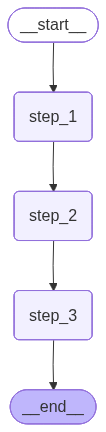

In [5]:
graph

In [6]:
try: 
    print('Running graph: Please manually interrupt during Step 2...')
    graph.invoke({'input':'start'}, config={'configurable': {'thread_id':'thread-1'}})

except KeyboardInterrupt:
    print('Kernel manually interrupted (crash simulated).')

Running graph: Please manually interrupt during Step 2...
Step 1 executed!!
Step 2 hangine... now manually interrupt from the notebook toolbar (STOP button)
Step 3 executed!!


In [9]:
graph.get_state({'configurable': {'thread_id': 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b6b-6fbc-8003-aab8a987158d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-02-28T17:52:15.573666+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b5b-666d-8002-bb1a63b1ad72'}}, tasks=(), interrupts=())

In [10]:
list(graph.get_state_history({'configurable': {'thread_id': 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b6b-6fbc-8003-aab8a987158d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-02-28T17:52:15.573666+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b5b-666d-8002-bb1a63b1ad72'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b5b-666d-8002-bb1a63b1ad72'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-28T17:52:15.566941+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce2-5d3b-6b43-8001-fc965a313b48'}}, tasks=(PregelTask(id='5790488a-27d1-a144-5a72-121f9738aa6

In [11]:
# Re-run to show fault-tolerant resume
final_state = graph.invoke(None, config={'configurable': {'thread_id': 'thread-1'}})
print('\n Final State: ', final_state)


 Final State:  {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [12]:
graph.get_state({'configurable':{'thread_id':'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b6b-6fbc-8003-aab8a987158d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-02-28T17:52:15.573666+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b5b-666d-8002-bb1a63b1ad72'}}, tasks=(), interrupts=())

In [13]:
list(graph.get_state_history({'configurable': {'thread_id': 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b6b-6fbc-8003-aab8a987158d'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-02-28T17:52:15.573666+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b5b-666d-8002-bb1a63b1ad72'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce3-7b5b-666d-8002-bb1a63b1ad72'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-02-28T17:52:15.566941+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f114ce2-5d3b-6b43-8001-fc965a313b48'}}, tasks=(PregelTask(id='5790488a-27d1-a144-5a72-121f9738aa6